# Algoritmos de optimización - Reto 1

Nombre: Jair Francisco Flores Farfan<br>
Github: https://github.com/jfloresf17/miar-viu/Algoritmos/Reto_1

In [1]:
import time
import matplotlib.pyplot as plt

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

 El objetivo es mover todos los discos al tercer poste siguiendo estas reglas:
1. Solo se puede mover un disco a la vez.
2. Un disco más grande no puede estar sobre un disco más pequeño.
3. Se puede usar un tercer poste auxiliar (en el medio) para mover los discos.

Cada instancia del problema puede dividirse en los siguientes subproblemas:

1. Mover n-1 discos del origen al poste auxiliar, usando el destino como apoyo.
2. Mover los n-1 discos del auxiliar al poste destino, usando el origen como apoyo
2. Mover el disco más grande directamente al destino (caso base)

Por lo tanto, la solución puede implementarse de forma recursiva para resolver estos tres subproblemas.

In [2]:
def hanoi(n, origen, auxiliar, destino):
    contador = 0
    def mover(n, origen, auxiliar, destino):
        nonlocal contador
        # Caso base: si hay un solo disco, lo movemos directamente
        if n == 1:
            print(f"Mueve el disco 1 de {origen} a {destino}")
            contador += 1
            return
        
        # Paso 1: Mover n-1 discos desde el origen al auxiliar, usando destino como apoyo
        mover(n-1, origen, destino, auxiliar)
        
        # Paso 2: Mover el disco más grande al destino
        print(f"Mueve el disco {n} de {origen} a {destino}")
        contador += 1
        
        # Paso 3: Mover los n-1 discos desde el auxiliar al destino, usando origen como apoyo
        mover(n-1, auxiliar, origen, destino)
    
    mover(n, origen, auxiliar, destino)
    return contador

In [3]:
n = 4
movimientos = hanoi(n, 'A', 'B', 'C')
print(f"Número total de movimientos: {movimientos}")

Mueve el disco 1 de A a B
Mueve el disco 2 de A a C
Mueve el disco 1 de B a C
Mueve el disco 3 de A a B
Mueve el disco 1 de C a A
Mueve el disco 2 de C a B
Mueve el disco 1 de A a B
Mueve el disco 4 de A a C
Mueve el disco 1 de B a C
Mueve el disco 2 de B a A
Mueve el disco 1 de C a A
Mueve el disco 3 de B a C
Mueve el disco 1 de A a B
Mueve el disco 2 de A a C
Mueve el disco 1 de B a C
Número total de movimientos: 15


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

La sucesión de Fibonacci es una secuencia matemática donde cada término es la suma de los dos anteriores, comenzando con los valores iniciales:
$ F(0) = 0, F(1) = 1 $

Para $n \geq 2$, la fórmula de recurrencia es:
$ F(n) = F(n-1) + F(n-2) $

In [4]:
# Sucesión_de_Fibonacci
# Algoritmo recursivo para la sucesión de Fibonacci
## La implementación recursiva de Fibonacci hace dos llamadas recursivas en cada nivel: 
def fibonacci_recursivo(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    return fibonacci_recursivo(n - 1) + fibonacci_recursivo(n - 2)


# Algoritmo iterativo para la sucesión de Fibonacci
# Usa solo dos variables para calcular la sucesión
def fibonacci_iterativo(n):
    # Si el número es 0 o menor, retornamos 0 (caso base)
    if n <= 0:
        return 0
    # Si el número es 1, retornamos 1 (caso base)
    elif n == 1:
        return 1
    
    # Inicializamos las dos primeras variables de Fibonacci
    a, b = 0, 1
    
    # Iteramos desde 1 hasta n-1 para calcular el valor de Fibonacci de manera eficiente
    for _ in range(n - 1):
        a, b = b, a + b  # Actualizamos a y b con los valores siguientes de Fibonacci
    
    return b  # Retornamos el valor de Fibonacci en la posición n

Se mide el tiempo de cómputo de ambos algoritmos para n = 5, 6, ..., 40 y graficando los resultados.
* Versión Recursiva: $O (2^n)$, debido a la cantidad de llamadas repetitivas. 
* Versión Iterativa: $O (n)$, ya que se usan solo dos variables para calcular la sucesión.

Como se observa en la gráfica, la versión recursiva se vuelve impráctica para valores grandes de n, mientras que la versión iterativa crece linealmente, siendo mucho más eficiente en la práctica.

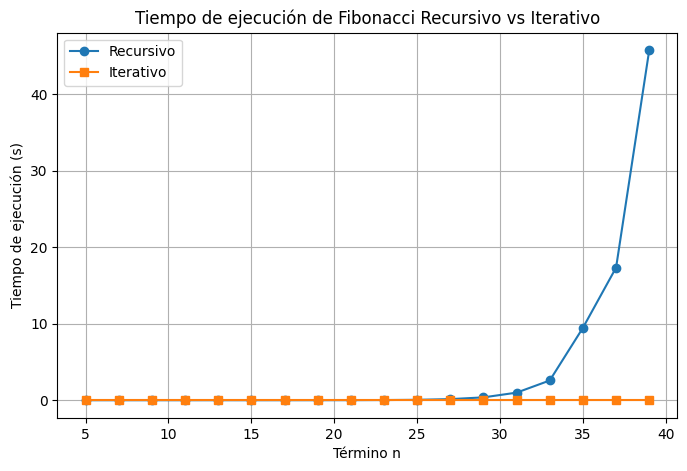

In [5]:
# Medir tiempos de ejecución
n_values = list(range(5, 40, 2))  # Valores de n
tiempos_recursivo = []
tiempos_iterativo = []

for n in n_values:
    start = time.time()
    fibonacci_recursivo(n)
    tiempos_recursivo.append(time.time() - start)

    start = time.time()
    fibonacci_iterativo(n)
    tiempos_iterativo.append(time.time() - start)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(n_values, tiempos_recursivo, label="Recursivo", marker="o")
plt.plot(n_values, tiempos_iterativo, label="Iterativo", marker="s")
plt.xlabel("Término n")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Tiempo de ejecución de Fibonacci Recursivo vs Iterativo")
plt.legend()
plt.grid(True)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

El problema del cambio de moneda consiste en determinar la **cantidad mínima de monedas necesarias para alcanzar una cantidad dada**, utilizando un conjunto de monedas con los valores disponibles. Este problema se resuelve eficientemente con una estrategia voraz cuando se cumplen ciertas condiciones.

El enfoque voraz **selecciona iterativamente la moneda de mayor valor disponible** hasta que se complete la cantidad requerida. Esto es eficiente cuando siempre es óptimo tomar la moneda de mayor valor posible en cada paso.

In [6]:
# Problema del cambio de moneda
def cambio_monedas_voraz(cantidad: int, valores: list) -> dict:
    """
    Resuelve el problema del cambio de moneda utilizando una estrategia voraz.
    
    Args:
    cantidad: int, la cantidad total a representar.
    valores: list, una lista de enteros con las valores disponibles.

    Returns:
    dict, un diccionario con los valores y su cantidad correspondiente.
    """
    resultado = {}
    
    for valor in valores:
        if cantidad >= valor:
            num_valores = cantidad // valor  # Determinar cuántas veces cabe el valor en la cantidad total
            cantidad -= num_valores * valor  # Restar la cantidad utilizada (valor * num_valores) a la cantidad total
            resultado[valor] = num_valores  # Guardar el valor y su cantidad correspondiente
    
    if cantidad > 0:
        print("No se puede representar el total con las valores dadas.")
    
    return resultado

In [7]:
# Prueba con euros (denominaciones estándar: 50, 20, 10, 5, 2, 1)
cantidad = 96  # Cantidad de dinero a descomponer
valores = [50, 20, 10, 5, 2, 1]  # Monedas disponibles ordenadas de mayor a menor

resultado = cambio_monedas_voraz(cantidad, valores)
## Suma de monedas mínimas
suma = 0
for _, cantidad_por_valor in resultado.items():
    suma += cantidad_por_valor
print("Cambio para", cantidad, "usando una estrategia voraz se necesitan", suma, "monedas:", resultado)

Cambio para 96 usando una estrategia voraz se necesitan 5 monedas: {50: 1, 20: 2, 5: 1, 1: 1}


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

El problema de las N-Reinas consiste en colocar N reinas en un tablero de N x N de tal manera que ninguna reina pueda atacar a otra. Es decir, **ninguna reina puede estar en la misma fila, columna o diagonal que otra.**

Este problema se resuelve eficientemente utilizando backtracking (vuelta atrás). La idea es colocar las reinas una por una en diferentes columnas y retroceder si encontramos una configuración inválida.

In [8]:
# Verifica si es seguro colocar una reina en una posición dada
def es_seguro(tablero: list, fila: int, col: int, n: int) -> bool:
    """
    Comprueba si una reina en la posición (fila, col) es válida.
    
    Args:
    tablero (list): Representación del tablero con la posición de las reinas.
    fila (int): Fila actual donde intentamos colocar la reina.
    col (int): Columna actual donde intentamos colocar la reina.
    n (int): Tamaño del tablero.
    
    Returns:
    bool: True si es seguro colocar la reina, False en caso contrario.
    """
    # Verificar la columna
    for i in range(fila):
        if tablero[i] == col:
            return False
    
    # Verificar diagonal izquierda superior
    for i, j in zip(range(fila, -1, -1), range(col, -1, -1)):
        if tablero[i] == j:
            return False
    
    # Verificar diagonal derecha superior
    for i, j in zip(range(fila, -1, -1), range(col, n)):
        if tablero[i] == j:
            return False
    
    return True

# Función recursiva para resolver el problema de N-Reinas
def resolver_n_reinas(tablero: list, fila: int, n: int, soluciones: list) -> None:
    """
    Encuentra todas las soluciones posibles usando backtracking.
    
    Args:
    tablero (list): Representación del tablero con la posición de las reinas.
    fila (int): Fila actual donde intentamos colocar una reina.
    n (int): Tamaño del tablero.
    soluciones (list): Lista para almacenar las soluciones encontradas.
    """
    if fila == n:  # Se han colocado todas las reinas correctamente
        solucion = [(i, tablero[i]) for i in range(n)]  # Convertir a coordenadas (fila, columna)
        soluciones.append(solucion)
        return
    
    for col in range(n):
        if es_seguro(tablero, fila, col, n):
            tablero[fila] = col  # Colocar la reina
            resolver_n_reinas(tablero, fila + 1, n, soluciones)
            tablero[fila] = -1  # Retroceder (backtracking)

# Función principal para inicializar la solución
def n_reinas(n: int) -> list:
    """
    Encuentra todas las soluciones al problema de las N-Reinas.
    
    Args:
    n (int): Tamaño del tablero (n x n).
    
    Returns:
    list: Lista de soluciones, donde cada solución es una lista con las coordenadas (fila, columna) de las reinas.
    """
    soluciones = []
    tablero = [-1] * n  # Inicializar tablero con -1 (sin reinas)
    resolver_n_reinas(tablero, 0, n, soluciones)
    return soluciones

In [9]:
# Ejecutar para un tablero de 8x8
n = 8
soluciones = n_reinas(n)
print(f"Se encontraron {len(soluciones)} soluciones para {n} reinas.")
for i, sol in enumerate(soluciones[:5]):  # Mostrar solo las primeras 5 soluciones
    print(f"Solución {i + 1}: {sol}")

Se encontraron 92 soluciones para 8 reinas.
Solución 1: [(0, 0), (1, 4), (2, 7), (3, 5), (4, 2), (5, 6), (6, 1), (7, 3)]
Solución 2: [(0, 0), (1, 5), (2, 7), (3, 2), (4, 6), (5, 3), (6, 1), (7, 4)]
Solución 3: [(0, 0), (1, 6), (2, 3), (3, 5), (4, 7), (5, 1), (6, 4), (7, 2)]
Solución 4: [(0, 0), (1, 6), (2, 4), (3, 7), (4, 1), (5, 3), (6, 5), (7, 2)]
Solución 5: [(0, 1), (1, 3), (2, 5), (3, 7), (4, 2), (5, 0), (6, 6), (7, 4)]


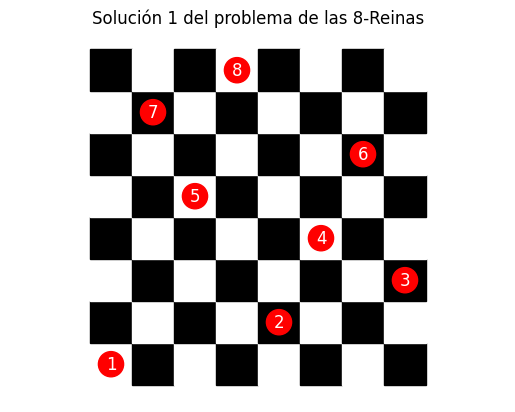

In [10]:
## Gráfica de la Solución 1 del problema de las N-Reinas
fig, ax = plt.subplots()
ax.set_xlim(-1, n)
ax.set_ylim(-1, n)

# Dibujar el tablero
for i in range(n):
    for j in range(n):
        color = (1, 1, 1) if (i + j) % 2 == 0 else (0, 0, 0)
        ax.add_patch(plt.Rectangle((i - 0.5, j - 0.5), 1, 1, color=color))

# Dibujar las reinas con números
for idx, (fila, col) in enumerate(soluciones[0]):
    ax.add_patch(plt.Circle((col, fila), radius=0.3, color="red"))
    ax.text(col, fila, str(idx + 1), color="white", ha="center", va="center", fontsize=12)

plt.axis("equal")
plt.axis("off")
plt.title(f"Solución 1 del problema de las {n}-Reinas")
plt.show()